In [1]:
#1 Import Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math
import stat
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [2]:
#2 Import Data
company_data = pd.read_csv('Company_Data.csv')
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


### DATA UNDERSTANDING

In [3]:
company_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [4]:
company_data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
company_data.describe(include='all')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400.000000,400.000000,400,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,Yes,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,219,NaN,NaN,282,258
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,NaN,53.322500,13.900000,NaN,NaN
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,NaN,16.200297,2.620528,NaN,NaN
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,NaN,25.000000,10.000000,NaN,NaN
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,NaN,39.750000,12.000000,NaN,NaN
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,NaN,54.500000,14.000000,NaN,NaN
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,NaN,66.000000,16.000000,NaN,NaN


In [6]:
company_data_copy= company_data.copy()
company_data_copy

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


**Data Transformation**
* OHE Encoding

In [7]:
company_data_ohe = pd.get_dummies(data=company_data_copy, columns = ['ShelveLoc','Urban','US'])
company_data_ohe

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


### Model Building

In [8]:
x=company_data_ohe.drop(labels='Sales',axis=1)
y=company_data_ohe[['Sales']]

In [9]:
x

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [10]:
y

,Sales
0,9.50
1,11.22
2,10.06
3,7.40
4,4.15
...,...
395,12.57
396,6.14
397,7.41
398,5.94


In [17]:
y.mean()

Sales    7.496325
dtype: float64

**Since the target variable is continious, we create a class of the value based on the mean <= 7.49 == "Min" and > 7.49 == "Max"**

In [18]:
company_data_ohe["sales"]="min"
company_data_ohe.loc[company_data_ohe["Sales"]>7.49,"sales"]="max"
company_data_ohe.drop(["Sales"],axis=1,inplace=True)
company_data_ohe

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,sales
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,max
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,max
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,max
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,min
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1,max
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1,min
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1,min
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1,min


In [21]:
x=company_data_ohe.drop(labels='sales',axis=1)
y=company_data_ohe[['sales']]

In [22]:
x

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [23]:
y

,sales
0,max
1,max
2,max
3,min
4,min
...,...
395,max
396,min
397,min
398,min


##### Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=12)

In [26]:
#Training data 
X_train.shape , y_train.shape

((320, 14), (320, 1))

In [27]:
#Test Data
X_test.shape , y_test.shape

((80, 14), (80, 1))

#### MODEL TRAINING

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

###### Model Testing

In [30]:
#Training Data
y_train_pred = dt_model.predict(X_train)

In [31]:
#Test Data
y_test_pred = dt_model.predict(X_test)

##### Model Evaluation

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix , precision_score , recall_score

In [33]:
#Training Data 
accuracy_score(y_train,y_train_pred)

1.0

In [34]:
confusion_matrix(y_train,y_train_pred)

array([[159,   0],
       [  0, 161]], dtype=int64)

In [37]:
#TEST DATA
accuracy_score(y_test,y_test_pred)

0.8375

In [38]:
confusion_matrix(y_test,y_test_pred)

array([[32,  8],
       [ 5, 35]], dtype=int64)

In [39]:
dt_model.feature_importances_

array([0.18017544, 0.05985556, 0.16056028, 0.03892724, 0.31328191,
       0.07052189, 0.01128832, 0.        , 0.12032697, 0.01987203,
       0.01666732, 0.        , 0.        , 0.00852306])

In [41]:
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': dt_model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [42]:
fi

,feature,importance
4,Price,0.313282
0,CompPrice,0.180175
2,Advertising,0.160560
8,ShelveLoc_Good,0.120327
5,Age,0.070522
1,Income,0.059856
3,Population,0.038927
9,ShelveLoc_Medium,0.019872
10,Urban_No,0.016667
6,Education,0.011288


**Price = most important feature**

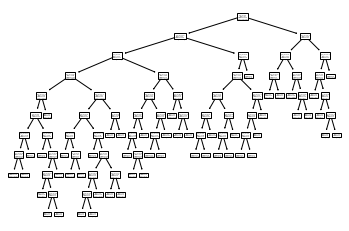

In [46]:
from sklearn import tree
tree.plot_tree(dt_model);